In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn import model_selection, preprocessing, metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [79]:
data = pd.read_csv('/Users/yangxi/Desktop/ECS260/project/cleaned_project_list.csv')

In [80]:
data = data.drop(columns='Unnamed: 0')
data = data.drop(columns='Comment Length')

In [81]:
data = data.drop(columns='Merge Frequency')

In [84]:
data['Project Status'].replace(2,0,inplace=True)

In [100]:
pd.set_option('display.max_rows', None)
data['Project Status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

# Exploratory data analysis

In [86]:
data.shape

(123, 14)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Full Name      123 non-null    object
 1   Project Status         123 non-null    int64 
 2   Project Startdate      123 non-null    object
 3   Project Enddate        123 non-null    object
 4   PR Number              123 non-null    int64 
 5   Merged PR Number       123 non-null    int64 
 6   First PR Created Time  123 non-null    object
 7   Issue Comment Number   123 non-null    int64 
 8   Review Comment Number  123 non-null    int64 
 9   Commits number         123 non-null    int64 
 10  Stars                  123 non-null    int64 
 11  Forks                  123 non-null    int64 
 12  size                   123 non-null    int64 
 13  contributor            123 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 13.6+ KB


In [88]:
data.describe()

,Project Status,PR Number,Merged PR Number,Issue Comment Number,Review Comment Number,Commits number,Stars,Forks,size,contributor
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02,123.000000
mean,0.796748,2162.536585,1151.609756,6778.479675,6814.902439,5294.739837,3323.650407,1351.910569,1.136638e+05,110.861789
std,0.404064,4290.860843,2111.854541,11510.233210,15660.452921,6924.735213,7290.734072,3277.568499,1.682541e+05,118.705264
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.320000e+02,3.000000
25%,1.000000,67.500000,20.000000,120.500000,60.500000,986.000000,95.500000,65.000000,1.362200e+04,22.000000
50%,1.000000,502.000000,192.000000,940.000000,832.000000,2674.000000,552.000000,214.000000,3.745600e+04,53.000000
75%,1.000000,2385.000000,1357.500000,7905.000000,5616.500000,6842.500000,2158.000000,913.000000,1.748695e+05,173.000000
max,1.000000,34300.000000,10700.000000,40000.000000,103228.000000,34628.000000,40000.000000,24263.000000,1.326009e+06,440.000000


We see that there are no missing values or significant outliers in any column.

In [89]:
data.head()

,Project Full Name,Project Status,Project Startdate,Project Enddate,PR Number,Merged PR Number,First PR Created Time,Issue Comment Number,Review Comment Number,Commits number,Stars,Forks,size,contributor
0,apache/Airflow,1,3/31/16,12/19/18,14061,9941,4/20/15 21:52,40000,41972,14056,23673,9559,137059,416
1,apache/Ambari,1,8/30/11,11/20/13,3235,2913,5/16/13 9:53,8527,2851,24588,1561,1340,365411,129
2,apache/apex-core,1,8/17/15,4/20/16,604,470,8/25/15 23:43,1772,3561,6122,347,180,14807,41
3,apache/APISIX,1,10/17/19,7/15/20,2786,2404,5/5/19 8:14,12980,8235,2578,7372,1340,24303,236
4,apache/AsterixDB,1,2/28/15,4/20/16,11,0,1/14/16 1:21,6,3,8582,213,115,181003,53


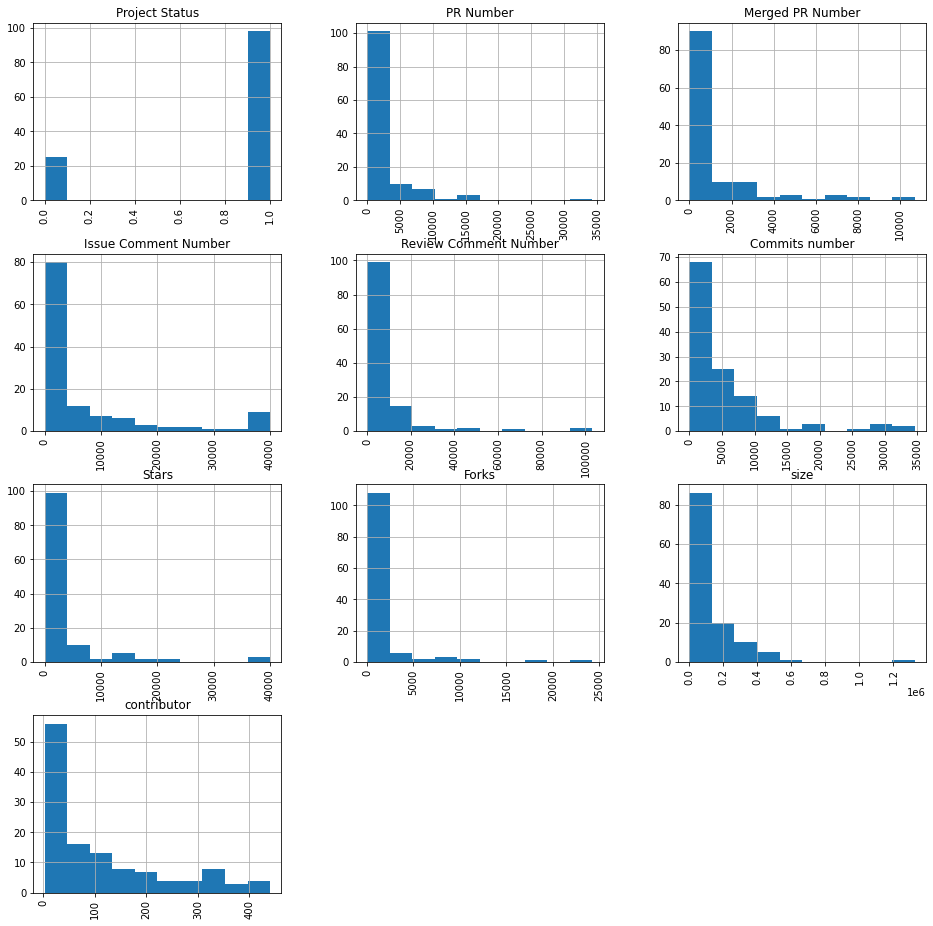

In [90]:
data.hist(figsize=(16,16),xrot = 90)
plt.show()

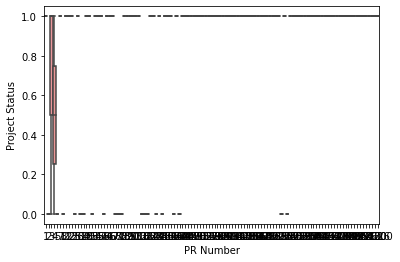

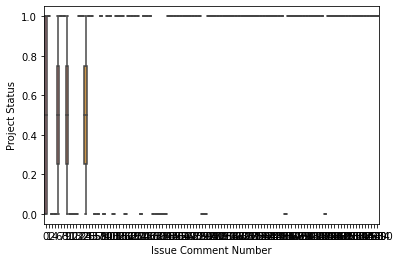

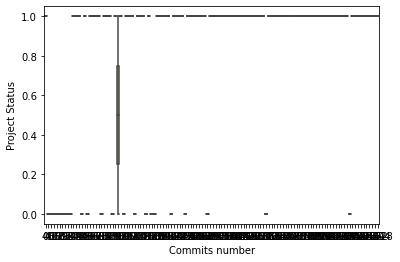

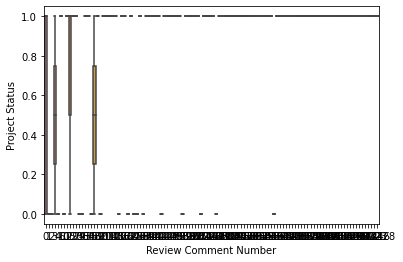

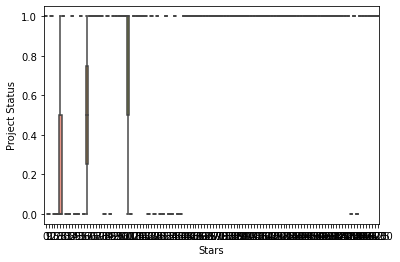

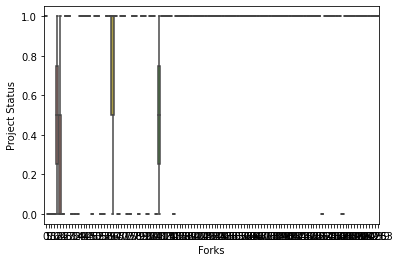

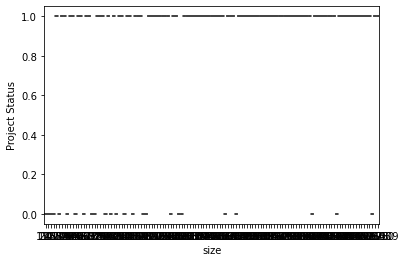

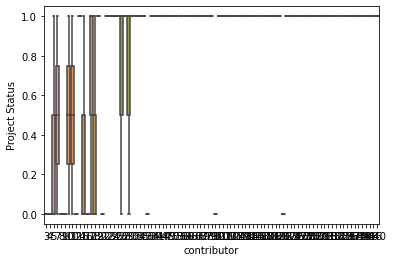

In [91]:
num_cols = ['PR Number',data['Issue Comment Number'],data['Commits number'],data['Review Comment Number'],data['Stars'],data['Forks'],data['size'],'contributor']

for col in num_cols:
    sns.boxplot(y = data['Project Status'].astype('category'), x=col, data=data)
    plt.show()

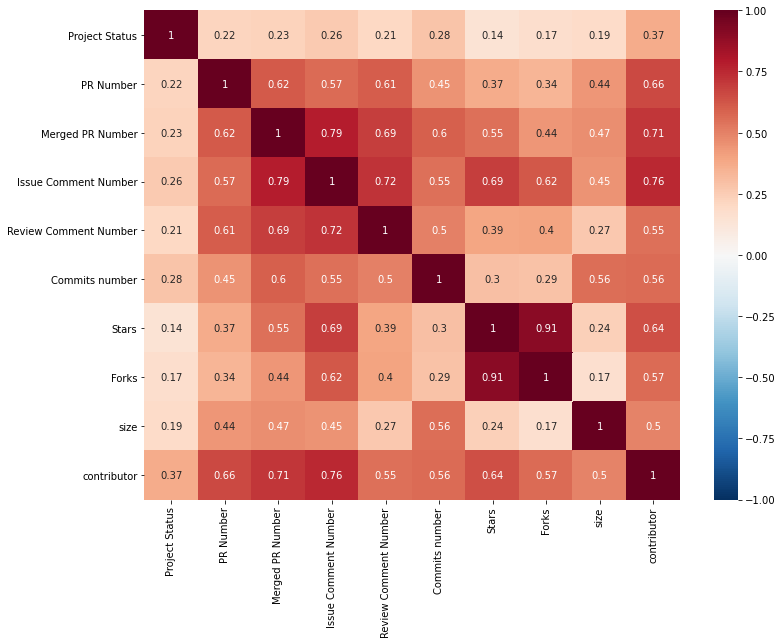

In [92]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [93]:
from sklearn import tree
y = data['Project Status']
X = data.iloc[:,4:]

In [94]:
X = X.drop(columns='First PR Created Time')

In [101]:
X = X.to_numpy(dtype=int, copy=True)

In [102]:
y = y.to_numpy(dtype=int, copy=True)

# logistic regression

In [103]:
import statsmodels.api as sm

In [104]:
model = sm.Logit(y, X)

In [105]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.286706
         Iterations 11


In [106]:
result.params

array([ 2.34549044e-04, -1.87333546e-03, -7.65941447e-05,  5.50234590e-04,
        1.42525802e-04, -1.03553036e-03,  4.31727981e-03, -2.11474740e-06,
        3.23701021e-02])

In [108]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                  0.4321
Time:                        22:17:53   Log-Likelihood:                -35.265
converged:                       True   LL-Null:                       -62.100
Covariance Type:            nonrobust   LLR p-value:                 7.999e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.002      0.096      0.923      -0.005       0.005
x2            -0.0019      0.003     -0.687      0.492      -0.007       0.003
x3         -7.659e-05      0.000     -0.183      0.855      -0.001       0.001
x4             0.0006      0.001      0.913      0.361      -0.001       0.002
x5             0.0001      0.000      0.601      0.548      -0.000       0.001
x6            -0.0010      0.001     -1.973      0.049      -0.002   -6.66e-06
x7             0.0043      0.003      1.306      0.192      -0.002       0.011
x8         -2.115e-06    3.2e-06     -0.660      0.509   -8.39e-06    4.16e-06
x9             0.0324      0.024      1.355      0.176      -0.014       0.079
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# todo：


    decision tree

[Text(131.52857142857144, 203.85, 'X[8] <= 21.5\ngini = 0.324\nsamples = 123\nvalue = [25, 98]'),
 Text(47.82857142857143, 176.67000000000002, 'X[4] <= 255.0\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(23.914285714285715, 149.49, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(71.74285714285715, 149.49, 'X[6] <= 62.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(47.82857142857143, 122.31, 'X[4] <= 726.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(23.914285714285715, 95.13, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(71.74285714285715, 95.13, 'X[4] <= 1136.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(47.82857142857143, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(95.65714285714286, 67.94999999999999, 'X[5] <= 55.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(71.74285714285715, 40.77000000000001, 'X[0] <= 55.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(47.82857142857143, 13.590000000000003, 'gini = 0.

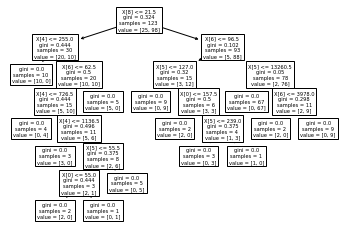

In [109]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

# model 2

In [42]:
data2 = pd.read_csv('/Users/yangxi/Desktop/ECS260/project/cleaned_project_w_pr.csv')

In [43]:
data2

,Unnamed: 0,Project Full Name,Project Status,Project Startdate,Project Enddate,PR Number,Merged PR Number,First PR Created Time,Comment Length,Merge Frequency,...,average_pr_comments_count,average_pr_review_coments_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_pr_comments_count,merged_average_pr_review_coments_count,merged_average_total_comments
0,1,apache/Airflow,1,3/31/16,12/19/18,14061,9941,4/20/15 21:52,0,0,...,4.927925,2.207509,7.135434,118.052030,113.491117,4.318528,1.511421,4.798223,4.798223,9.596447
1,2,apache/Ambari,1,8/30/11,11/20/13,3235,2913,5/16/13 9:53,0,0,...,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,apache/apex-core,1,8/17/15,4/20/16,604,470,8/25/15 23:43,0,0,...,2.403846,2.871795,5.275641,153.045267,63.641975,6.670782,1.855967,2.358025,2.358025,4.716049
3,4,apache/APISIX,1,10/17/19,7/15/20,2786,2404,5/5/19 8:14,0,0,...,1.511589,2.430464,3.942053,98.253465,18.641584,4.299010,3.095050,1.324752,1.324752,2.649505
4,5,apache/AsterixDB,1,2/28/15,4/20/16,11,0,1/14/16 1:21,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,118,apache/Sirona,2,10/15/13,7/3/17,2,0,11/1/13 14:46,0,0,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111,119,apache/incubator-retired-slider,2,4/29/14,5/24/18,2,0,11/10/14 21:28,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112,120,apache/incubator-retired-tamaya,2,11/14/14,4/30/20,53,40,12/6/14 12:24,0,0,...,1.037736,0.547170,1.584906,99.350000,133.275000,12.225000,1.500000,0.850000,0.850000,1.700000
113,121,apache/incubator-retired-wave,2,12/4/10,1/15/18,25,13,1/12/14 18:10,0,0,...,4.166667,1.791667,5.958333,810.384615,6038.384615,268.769231,3.923077,4.153846,4.153846,8.307692


In [44]:
data2 = data2.drop(columns='Unnamed: 0')
data2 = data2.drop(columns='Comment Length')

In [45]:
data2 = data2.drop(columns='Project Enddate')
data2 = data2.drop(columns='Project Startdate')
data2 = data2.drop(columns='PR Number')
data2 = data2.drop(columns='Merged PR Number')
data2 = data2.drop(columns='First PR Created Time')
data2 = data2.drop(columns='Issue Comment Number')
data2 = data2.drop(columns='Review Comment Number')

In [46]:
data2 = data2.drop(columns='Commits number')
data2 = data2.drop(columns='Stars')
data2 = data2.drop(columns='Forks')
data2 = data2.drop(columns='size')
data2 = data2.drop(columns='contributor')

In [47]:
data2 = data2.drop(columns='Merge Frequency')

In [48]:
data2 = data2.drop(columns='average_pr_comments_count')
data2 = data2.drop(columns='average_pr_review_coments_count')

In [49]:
data2 = data2.drop(columns='merged_average_pr_review_coments_count')

In [50]:
data2['Project Status'].replace(2,0,inplace=True)

In [51]:
data2 = data2.drop(columns='Project Full Name')

In [52]:
data2['Code Churn'] = data2['average_additions'] + data2['average_deletions']

In [53]:
data2 = data2.drop(columns='average_additions')
data2 = data2.drop(columns='average_deletions')

In [54]:
data2.shape

(115, 11)

In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Project Status                    115 non-null    int64  
 1   average_pr_changed_files          115 non-null    float64
 2   average_pr_commits_count          115 non-null    float64
 3   average_total_comments            115 non-null    float64
 4   merged_average_additions          115 non-null    float64
 5   merged_average_deletions          115 non-null    float64
 6   merged_average_pr_changed_files   115 non-null    float64
 7   merged_average_pr_commits_count   115 non-null    float64
 8   merged_average_pr_comments_count  115 non-null    float64
 9   merged_average_total_comments     115 non-null    float64
 10  Code Churn                        115 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 10.0 KB


In [56]:
data2.describe()

,Project Status,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_pr_comments_count,merged_average_total_comments,Code Churn
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.791304,46.037029,7.869597,3.533780,1136.340580,357.620372,17.279203,2.905709,1.539613,3.079225,4315.237126
std,0.408155,159.451148,15.801346,3.591048,4949.672681,827.720451,37.144919,4.867367,2.309091,4.618182,13923.315678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.376326,1.468351,0.834061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,249.133333
50%,1.000000,15.451710,3.102850,2.392067,232.000000,70.577320,7.612903,1.500000,0.737654,1.475309,897.250000
75%,1.000000,23.245868,6.032048,5.061477,592.650747,312.732999,15.180786,3.447851,2.109555,4.219109,1862.777007
max,1.000000,1579.750000,116.333333,16.750000,50098.763160,6038.384615,268.769231,32.582474,14.625000,29.250000,99522.384620


In [57]:
data2.head()

,Project Status,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_pr_comments_count,merged_average_total_comments,Code Churn
0,1,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,4.798223,9.596447,438.561180
1,1,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9065.666666
2,1,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,2.358025,4.716049,301.740385
3,1,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,1.324752,2.649505,221.807947
4,1,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9637.000000


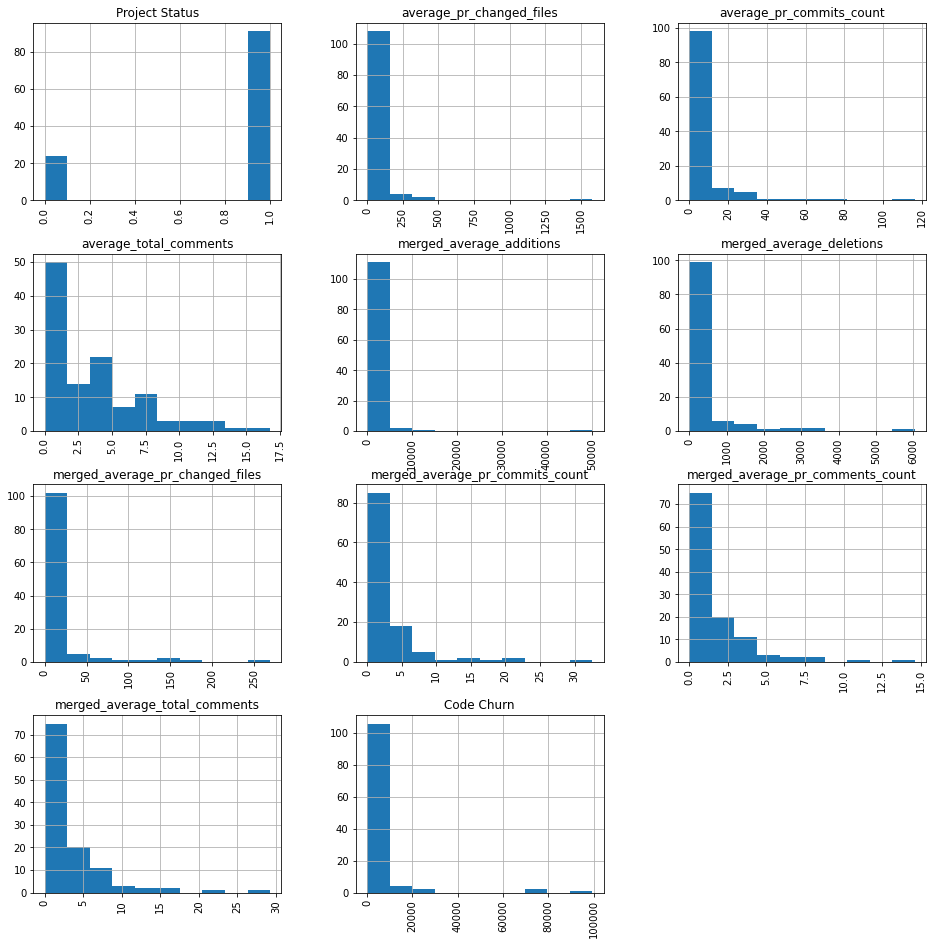

In [58]:
data2.hist(figsize=(16,16),xrot = 90)
plt.show()

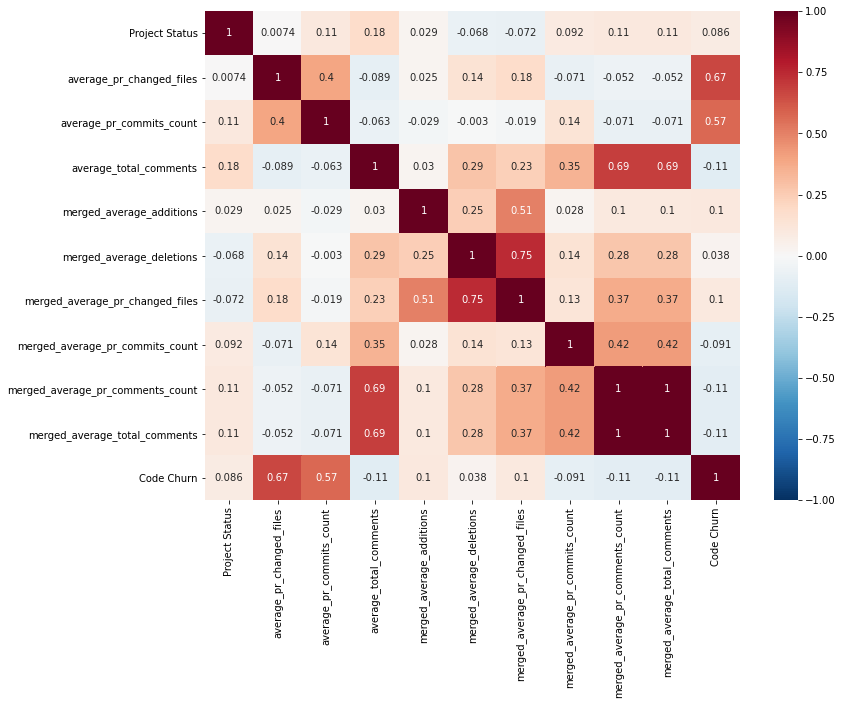

In [61]:
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [59]:
y2 = data2['Project Status']
X2 = data2.iloc[:,1:]

In [60]:
X2

,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_pr_comments_count,merged_average_total_comments,Code Churn
0,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,4.798223,9.596447,438.561180
1,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9065.666666
2,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,2.358025,4.716049,301.740385
3,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,1.324752,2.649505,221.807947
4,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9637.000000
...,...,...,...,...,...,...,...,...,...,...
110,45.500000,5.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,784.500000
111,9.000000,22.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,314.000000
112,11.811321,1.452830,1.584906,99.350000,133.275000,12.225000,1.500000,0.850000,1.700000,284.679245
113,441.208333,12.458333,5.958333,810.384615,6038.384615,268.769231,3.923077,4.153846,8.307692,10392.083333


In [62]:
X2 = X2.to_numpy(dtype=int, copy=True)
y2 = y2.to_numpy(dtype=int, copy=True)

In [63]:
import statsmodels.api as sm
model2 = sm.Logit(y2, X2)
result2 = model2.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.450947
         Iterations 10


In [64]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            9
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                  0.1196
Time:                        22:20:25   Log-Likelihood:                -51.859
converged:                       True   LL-Null:                       -58.906
Covariance Type:            nonrobust   LLR p-value:                    0.1190
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0163      0.013     -1.255      0.210      -0.042       0.009
x2             0.0510      0.052      0.976      0.329      -0.051       0.153
x3             0.3852      0.157      2.450      0.014       0.077       0.693
x4         -6.116e-05      0.000     -0.434      0.664      -0.000       0.000
x5            -0.0003      0.001     -0.438      0.661      -0.002       0.001
x6            -0.0031      0.024     -0.134      0.894      -0.049       0.043
x7             0.0853      0.121      0.708      0.479      -0.151       0.322
x8             2.5554      1.252      2.041      0.041       0.101       5.010
x9            -1.2244      0.624     -1.962      0.050      -2.447      -0.001
x10            0.0003      0.000      1.297      0.195      -0.000       0.001
==============================================================================
"""